<a href="https://colab.research.google.com/github/srivatsan88/YouTubeLI/blob/master/AutoSklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to supporting video for below notebook walkhthrough - https://www.youtube.com/watch?v=SMUNVfbr3Mc



In [0]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

In [0]:
from __future__ import print_function
import sys,tempfile, urllib, os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [0]:
BASE_DIR = '/tmp'
OUTPUT_FILE = os.path.join(BASE_DIR, 'churn_data.csv')

In [0]:
churn_data=urllib.request.urlretrieve('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv', OUTPUT_FILE)

In [0]:
churn_df = pd.read_csv(OUTPUT_FILE)

In [0]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
churn_df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [0]:
churn_df = churn_df.replace(r'^\s*$', np.nan, regex=True)
churn_df.iloc[:, 19] = pd.to_numeric(churn_df.iloc[:, 19], errors='coerce')

from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
churn_df.iloc[:, 19] = imp_median.fit_transform(churn_df.iloc[:, 19].values.reshape(-1, 1) )


In [0]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = ['gender', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
column_trans = make_column_transformer((OrdinalEncoder(), categorical_columns))

churn_transformed=column_trans.fit_transform(churn_df)

In [0]:
churn_df_trans = churn_df.copy()
churn_df_trans = pd.DataFrame(churn_transformed, columns=categorical_columns).astype(int)

In [0]:
churn_df.update(churn_df_trans)

In [0]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [0]:
churn_df_X = churn_df.copy()
churn_df_y =  churn_df_X.pop('Churn')

In [0]:
churn_df_X.pop("customerID")

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

In [0]:
churn_df_y=pd.to_numeric(churn_df_y).astype(int)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(churn_df_X, churn_df_y, train_size=0.75, test_size=0.25)

In [0]:
#feature_types = (['categorical'] * 4) + (['numerical'] * 1) + (['categorical'] * 12) + (['numerical'] * 2)
#feature_types

In [0]:
import autosklearn.classification

In [0]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=120, per_run_time_limit=30, n_jobs=2,
    include_estimators=["random_forest", "sgd", ], exclude_estimators=None, include_preprocessors=["no_preprocessing", ], exclude_preprocessors=None)

In [0]:
automl.fit(X_train, y_train)   #, dataset_name='churn', feat_type=feature_types)

[WARNING] [2020-01-07 03:52:48,952:EnsembleBuilder(1791095845):553a1a40e63a8853764d97603c9919e0] No models better than random - using Dummy Score!
[WARNING] [2020-01-07 03:52:48,975:EnsembleBuilder(1791095845):553a1a40e63a8853764d97603c9919e0] No models better than random - using Dummy Score!


AutoSklearnClassifier(delete_output_folder_after_terminate=False,
                      delete_tmp_folder_after_terminate=False,
                      disable_evaluator_output=False,
                      ensemble_memory_limit=1024, ensemble_nbest=50,
                      ensemble_size=50, exclude_estimators=None,
                      exclude_preprocessors=None, get_smac_object_callback=None,
                      include_estimators=['random_forest', 'sgd'],
                      include_preprocessors=['no_preprocessing'],
                      initial_configurations_via_metalearning=25,
                      logging_config=None, metadata_directory=None,
                      ml_memory_limit=3072, n_jobs=2, output_folder=None,
                      per_run_time_limit=30, resampling_strategy='holdout',
                      resampling_strategy_arguments=None, seed=1,
                      shared_mode=False, smac_scenario_args=None,
                      time_left_for_this_task=120, tm

In [0]:
#automl.cv_results_

In [0]:
print(automl.show_models())

[(0.740000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'sgd', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'minmax', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'False', 'classifier:sgd:alpha': 0.00015020473455612936, 'classifier:sgd:average': 'True', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'constant', 'classifier:sgd:loss': 'perceptron', 'classifier:sgd:penalty': 'l2', 'classifier:sgd:tol': 0.00019916862821730384, 'classifier:sgd:eta0': 0.00017377549695989675},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.100000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'categorical_encoding:__choice__': 'no_encoding', 'classifier:__choice__': 'sgd', 'imputation:str

In [0]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 553a1a40e63a8853764d97603c9919e0
  Metric: accuracy
  Best validation score: 0.799885
  Number of target algorithm runs: 148
  Number of successful target algorithm runs: 148
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



In [0]:
automl.cv_results_['params'][np.argmax(automl.cv_results_['mean_test_score'])]

{'balancing:strategy': 'none',
 'categorical_encoding:__choice__': 'no_encoding',
 'classifier:__choice__': 'sgd',
 'classifier:sgd:alpha': 6.688106445393722e-05,
 'classifier:sgd:average': 'True',
 'classifier:sgd:epsilon': 0.008825370738954516,
 'classifier:sgd:fit_intercept': 'True',
 'classifier:sgd:l1_ratio': 0.5999644226837954,
 'classifier:sgd:learning_rate': 'optimal',
 'classifier:sgd:loss': 'modified_huber',
 'classifier:sgd:penalty': 'elasticnet',
 'classifier:sgd:tol': 0.00015920784559559734,
 'imputation:strategy': 'mean',
 'preprocessor:__choice__': 'no_preprocessing',
 'rescaling:__choice__': 'quantile_transformer',
 'rescaling:quantile_transformer:n_quantiles': 1911,
 'rescaling:quantile_transformer:output_distribution': 'normal'}

In [0]:
predictions = automl.predict(X_test)

In [0]:
import sklearn.metrics
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score 0.8103350369108461


In [0]:
import pickle
x = automl.show_models()
results = {"ensemble": x}
pickle.dump(results, open('churn.pickle','wb'))

In [0]:
!ls *.pickle

churn.pickle  fname.pickle


In [0]:
np.bincount(predictions)

array([1422,  339])

In [0]:
np.bincount(y_test)

array([1300,  461])

In [0]:
max(y_test.mean(), 1 - y_test.mean())

0.7382169222032936

In [0]:
print(sklearn.metrics.confusion_matrix(y_test, predictions))

[[1194  106]
 [ 228  233]]


In [0]:
import seaborn as sn
import matplotlib.pyplot as plt

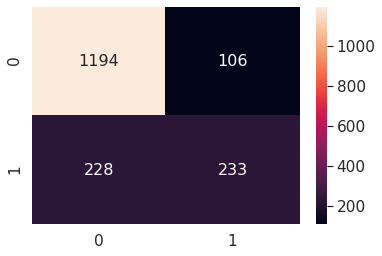

In [0]:
sn.set(font_scale=1.4)
sn.heatmap(pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, predictions)), annot=True, annot_kws={"size": 16}, fmt='')
plt.show()

Of all the users that the algorithm predicts will churn, how many of them do actually churn?

In [0]:
print(sklearn.metrics.precision_score(y_test, predictions))

0.6873156342182891


What percentage of users that end up churning does the algorithm successfully find?

In [0]:
print(sklearn.metrics.recall_score(y_test, predictions))

0.5054229934924078
